# Nettoyage du dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#statsmodel
#Parameter "stratify" from method "train_test_split"

testsize0.2
randomstate42

In [3]:
data = pd.read_csv('data/4072eb5e-e963-4a17-a794-3ea028d0a9c4.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Vérification de valeurs manquantes

In [4]:
print(data.isnull().sum())
# aucune valeur manquante

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
data.loc[data['age'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 1.0, 'Bar chart : sex')

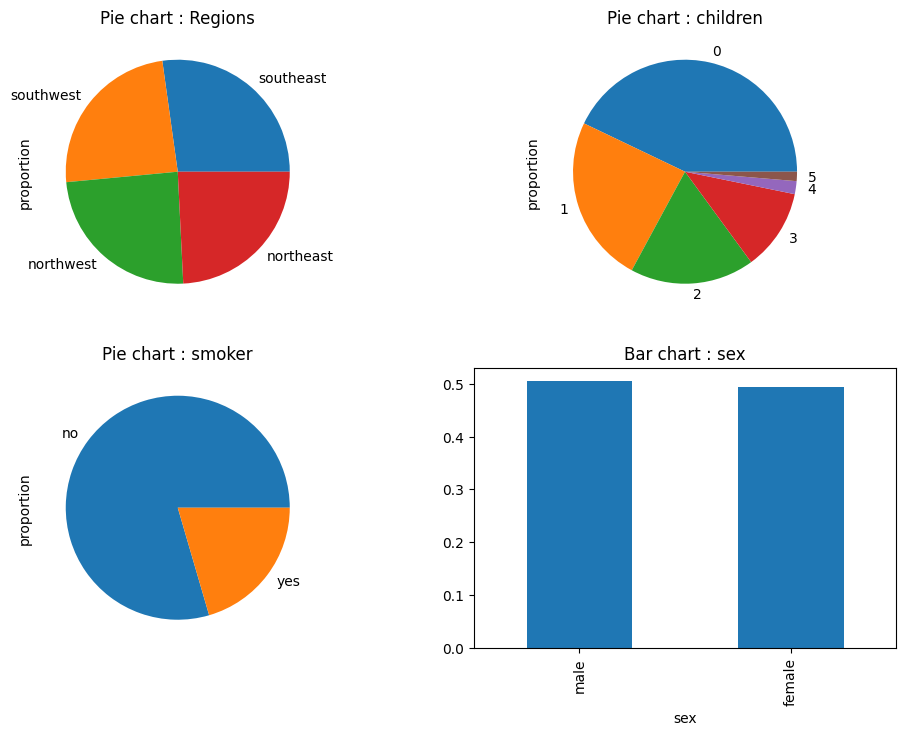

In [6]:
plt.figure(figsize=(12, 8))

# Tracer un boxplot pour 'bmi'
plt.subplot(2, 2, 1)
data["region"].value_counts(normalize=True).plot(kind='pie')
plt.title("Pie chart : Regions")

plt.subplot(2, 2, 2)
data["children"].value_counts(normalize=True).plot(kind='pie')
plt.title("Pie chart : children")

plt.subplot(2, 2, 3)
data["smoker"].value_counts(normalize=True).plot(kind='pie')
plt.title("Pie chart : smoker")

plt.subplot(2, 2, 4)
data["sex"].value_counts(normalize=True).plot(kind='bar')
plt.title("Bar chart : sex")

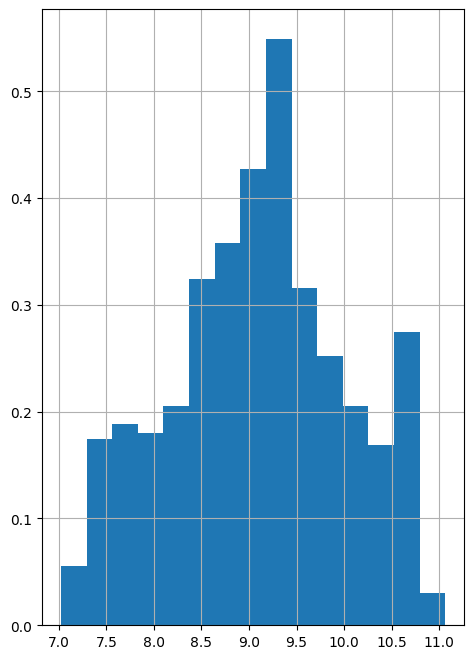

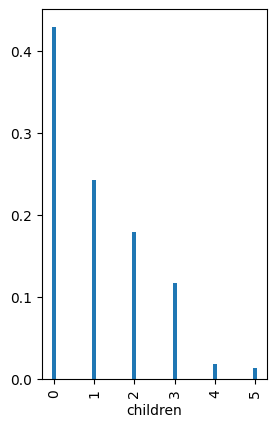

In [7]:


import numpy as np
plt.figure(figsize=(12, 8))
# Histogramme plus beau
plt.subplot(1,2, 1)
np.log(data["charges"]).hist(density=True,bins = 15)
plt.show()

# Diagramme en bâtons
plt.subplot(1,2, 2)
data["children"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

## Vérification des doublons

In [8]:
# Identifier les lignes dupliquées
duplicates = data[data.duplicated()]
print(f"liste des doublons : \n{duplicates}")
data.drop_duplicates()

liste des doublons : 
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


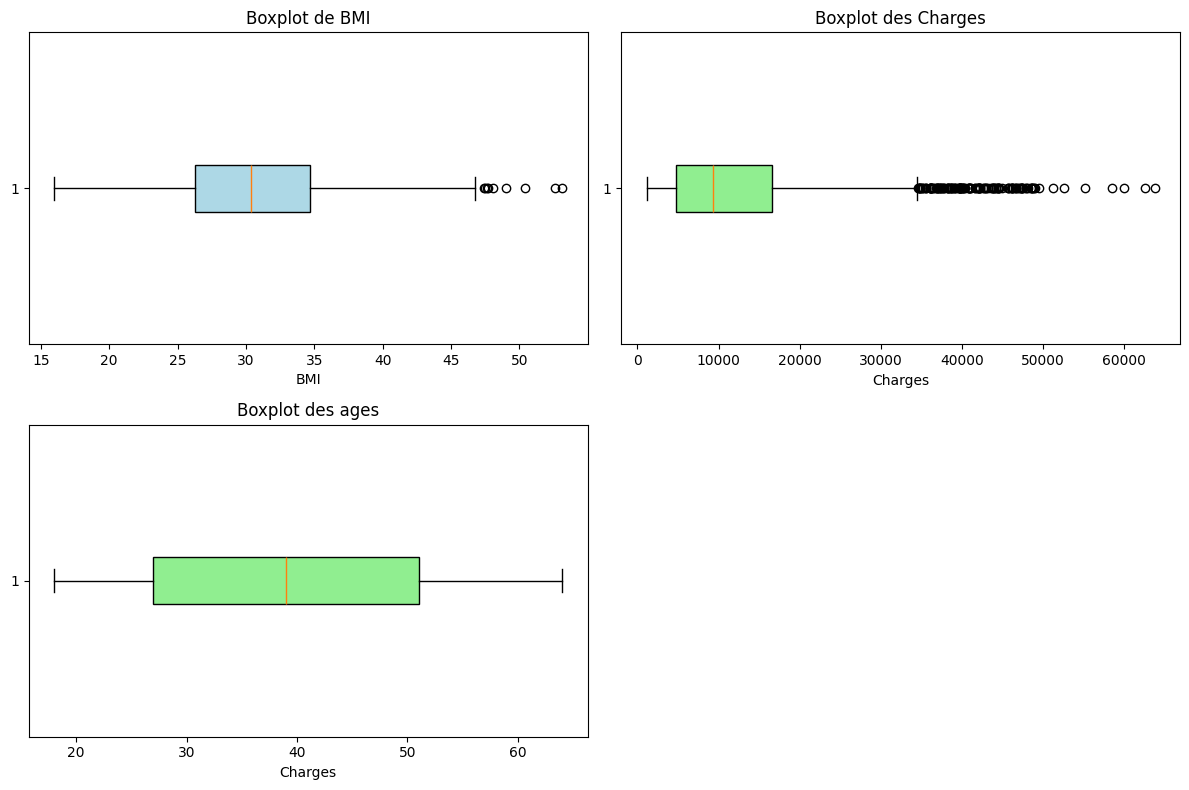

In [9]:
# Tracer des boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 8))

# Tracer un boxplot pour 'bmi'
plt.subplot(2, 2, 1)
plt.boxplot(data["bmi"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot de BMI")
plt.xlabel("BMI")

# Tracer un boxplot pour 'charges'
plt.subplot(2, 2, 2)
plt.boxplot(data["charges"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot des Charges")
plt.xlabel("Charges")


# Tracer un boxplot pour 'charges'
plt.subplot(2, 2, 3)
plt.boxplot(data["age"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot des ages")
plt.xlabel("Charges")


# # Scatter plot pour 'age' vs 'charges'
# plt.subplot(2, 2, 3)
# plt.scatter(data["age"], data["charges"], c="purple", alpha=0.7)
# plt.title("Scatter plot : Age vs Charges")
# plt.xlabel("Age")
# plt.ylabel("Charges")

# # Scatter plot pour 'bmi' vs 'charges'
# plt.subplot(2, 2, 4)
# plt.scatter(data["bmi"], data["charges"], c="orange", alpha=0.7)
# plt.title("Scatter plot : BMI vs Charges")
# plt.xlabel("BMI")
# plt.ylabel("Charges")

plt.tight_layout()
plt.show()

In [10]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
effectifs_children = data['children'].value_counts()
modalites = effectifs_children.index

tab = pd.DataFrame(modalites, columns = ['children'])
tab

,children
0,0
1,1
2,2
3,3
4,4
5,5


In [12]:
tab["n"] = effectifs_children
tab["f"] = tab["n"] / len(data)
tab["F"] = tab["f"].cumsum()
tab

,children,n,f,F
0,0,574,0.428999,0.428999
1,1,324,0.242152,0.671151
2,2,240,0.179372,0.850523
3,3,157,0.117339,0.967862
4,4,25,0.018685,0.986547
5,5,18,0.013453,1.000000


In [26]:
dbins_age = [0, 30 , 45, 60, np.inf]
label_age = ['jeune,'mature', 'agé, sénoir]
df['age_group'] = pd.cut(df['age'], bins = bins_age, label = label_age)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4117732964.py, line 2)

In [14]:
data["homme"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)
data["femme"] = data["sex"].apply(lambda x: 1 if x == "female" else 0)
data.head()

,age,sex,bmi,children,smoker,region,charges,homme,femme
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [15]:
data["southwest"] = data["region"].apply(lambda x: 1 if x == "southwest" else 0)
data["northwest"] = data["region"].apply(lambda x: 1 if x == "northwest" else 0)
data["northeast"] = data["region"].apply(lambda x: 1 if x == "northeast" else 0)
data["southeast"] = data["region"].apply(lambda x: 1 if x == "southeast" else 0)
data.head()


,age,sex,bmi,children,smoker,region,charges,homme,femme,southwest,northwest,northeast,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [16]:
data["fumeur"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data["non fumeur"] = data["smoker"].apply(lambda x: 1 if x == "no" else 0)
data.head()



,age,sex,bmi,children,smoker,region,charges,homme,femme,southwest,northwest,northeast,southeast,fumeur,non fumeur
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,0,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,0,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0,0,1


In [17]:
data2 = data.select_dtypes(include=['number'])
data2.head()


,age,bmi,children,charges,homme,femme,southwest,northwest,northeast,southeast,fumeur,non fumeur
0,19,27.900,0,16884.92400,0,1,1,0,0,0,1,0
1,18,33.770,1,1725.55230,1,0,0,0,0,1,0,1
2,28,33.000,3,4449.46200,1,0,0,0,0,1,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,1


In [18]:
mu_list = []
std_list = []

def normalize(df):
    # Créer une copie du DataFrame pour éviter de modifier l'original
    normalized_df = df.copy()
    
    # Listes pour stocker les moyennes et écarts types
    mu_list = []
    std_list = []
    
    # Normaliser les colonnes numériques
def normalize_data(data):
    print(data.shape[1])
    for i in range(0,data.shape[1]):
        mu = np.mean(data.iloc[1:,i])
        std = np.std(data.iloc[1:,i])
        data.iloc[:,i] = ((data.iloc[:,i] - mu)/std)
    return data

data2_ = normalize_data(data2)



12


/tmp/ipykernel_78305/3035946111.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -1.440418
1      -1.511647
2      -0.799350
3      -0.443201
4      -0.514431
          ...   
1333    0.767704
1334   -1.511647
1335   -1.511647
1336   -1.297958
1337    1.551231
Name: age, Length: 1338, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i] = ((data.iloc[:,i] - mu)/std)
/tmp/ipykernel_78305/3035946111.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -0.909234
1      -0.079442
2       1.580143
3      -0.909234
4      -0.909234
          ...   
1333    1.580143
1334   -0.909234
1335   -0.909234
1336   -0.909234
1337   -0.909234
Name: children, Length: 1338, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  da

In [19]:
data2_.head()

,age,bmi,children,charges,homme,femme,southwest,northwest,northeast,southeast,fumeur,non fumeur
0,-1.440418,-0.453524,-0.909234,0.298705,-1.011283,1.011283,1.768203,-0.566698,-0.565546,-0.611638,1.974192,-1.974192
1,-1.511647,0.509131,-0.079442,-0.953141,0.988843,-0.988843,-0.565546,-0.566698,-0.565546,1.634955,-0.506536,0.506536
2,-0.799350,0.382854,1.580143,-0.728203,0.988843,-0.988843,-0.565546,-0.566698,-0.565546,1.634955,-0.506536,0.506536
3,-0.443201,-1.305482,-0.909234,0.719821,0.988843,-0.988843,-0.565546,1.764609,-0.565546,-0.611638,-0.506536,0.506536
4,-0.514431,-0.292808,-0.909234,-0.776314,0.988843,-0.988843,-0.565546,1.764609,-0.565546,-0.611638,-0.506536,0.506536


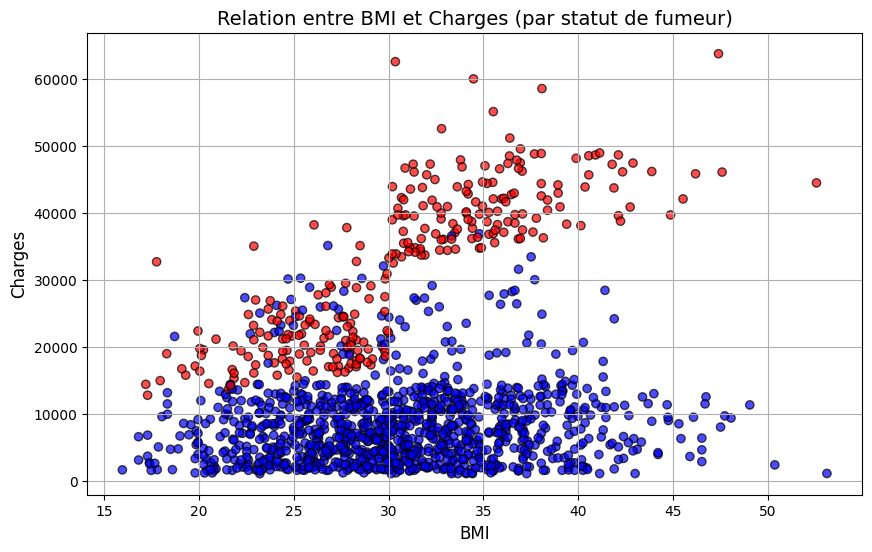

In [20]:
# Scatter plot
plt.figure(figsize=(10, 6))

# Définir les couleurs selon le statut de fumeur
colors = data['smoker'].map({'yes': 'red', 'no': 'blue'})

# Création du scatter plot
plt.scatter(data['bmi'], data['charges'], c=colors, alpha=0.7, edgecolors='k')

# Ajouter des légendes et des titres
plt.title('Relation entre BMI et Charges (par statut de fumeur)', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)

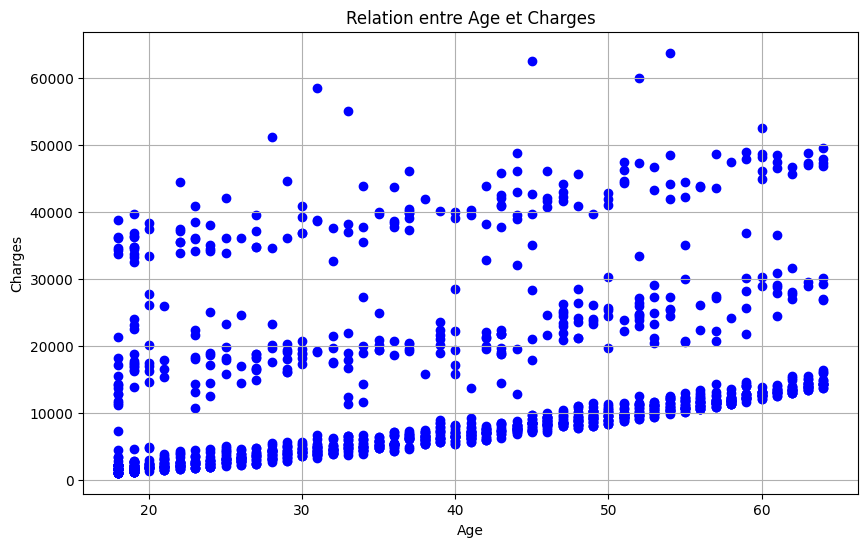

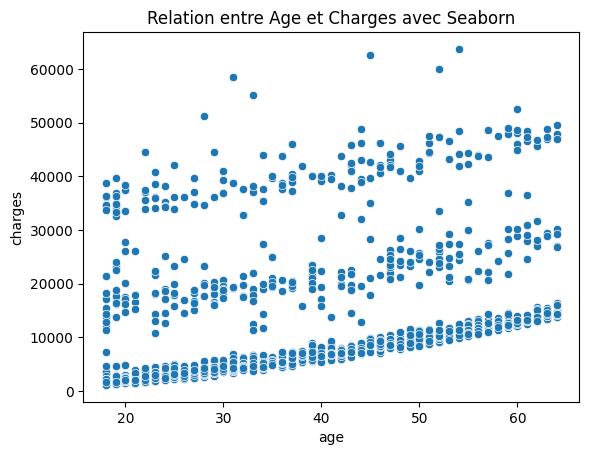

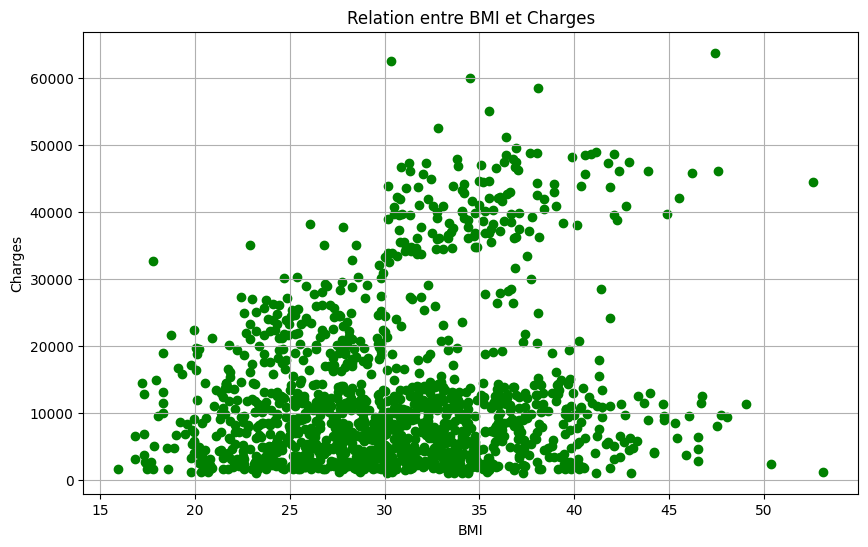

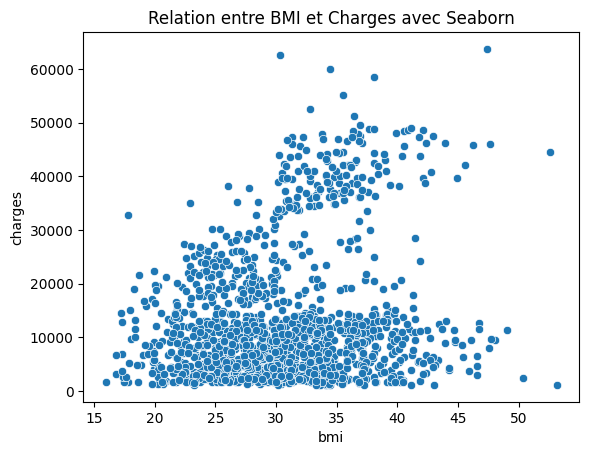

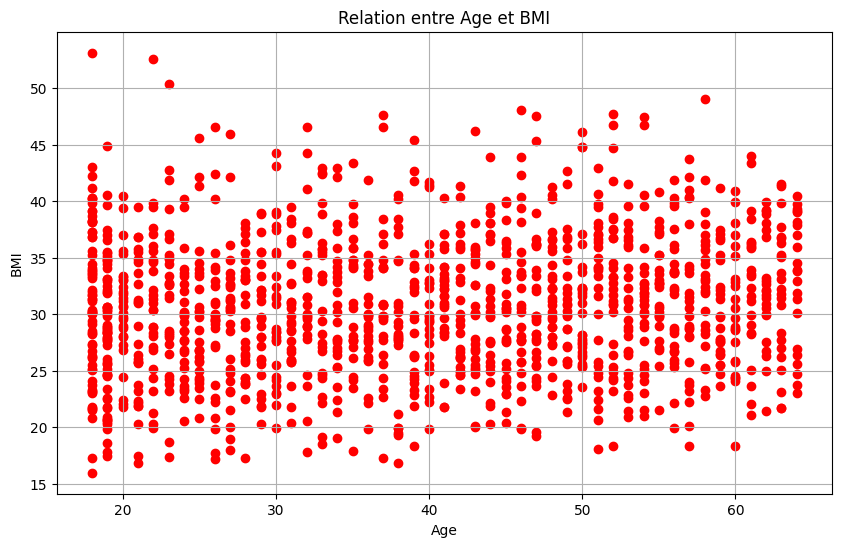

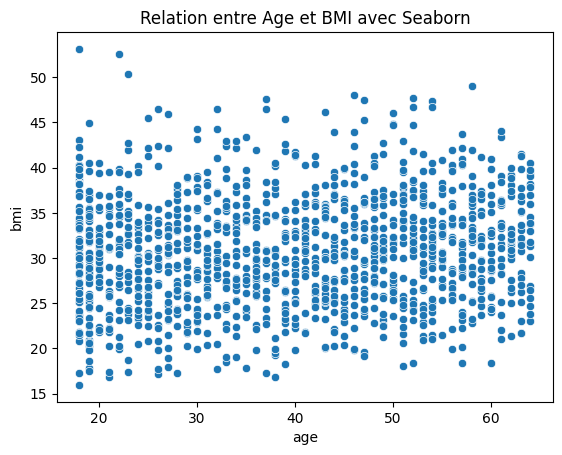

In [25]:
# Scatter Plot avec Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], color='blue')
plt.title('Relation entre Age et Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter Plot avec Seaborn
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Relation entre Age et Charges avec Seaborn')
plt.show()

# Scatter plot pour BMI et Charges
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], color='green')
plt.title('Relation entre BMI et Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()
# AJOUT COULEUR POUR FUMEUR NON FUMEUR


# Scatter Plot avec Seaborn pour BMI et Charges
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('Relation entre BMI et Charges avec Seaborn')
plt.show()

# Scatter plot pour Age et BMI
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['bmi'], color='red')
plt.title('Relation entre Age et BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Scatter Plot avec Seaborn pour Age et BMI
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Relation entre Age et BMI avec Seaborn')
plt.show()

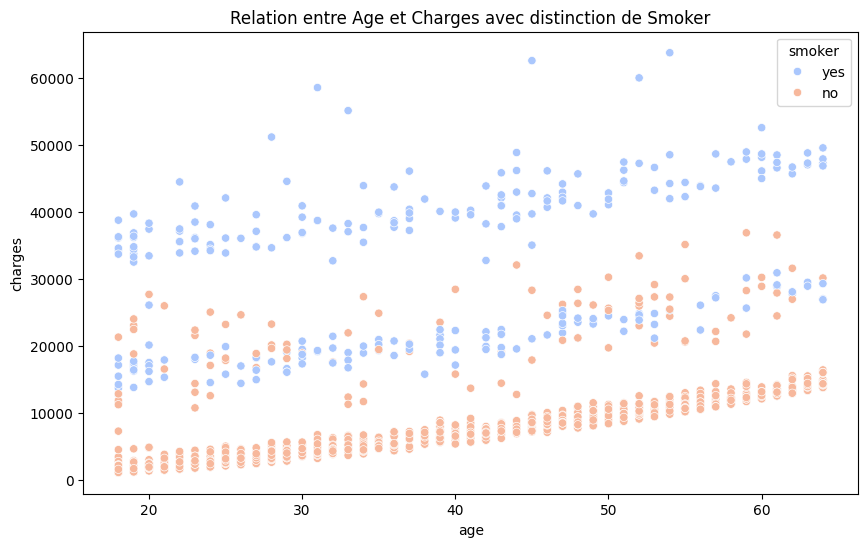

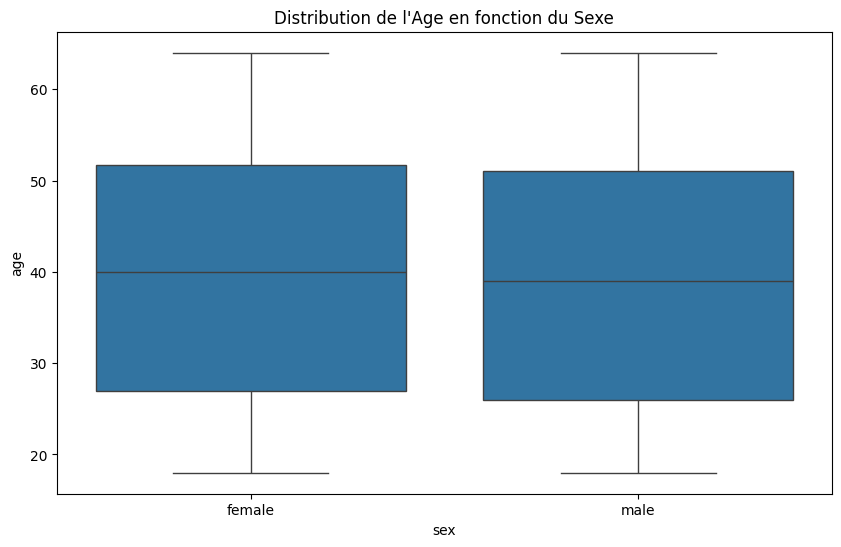

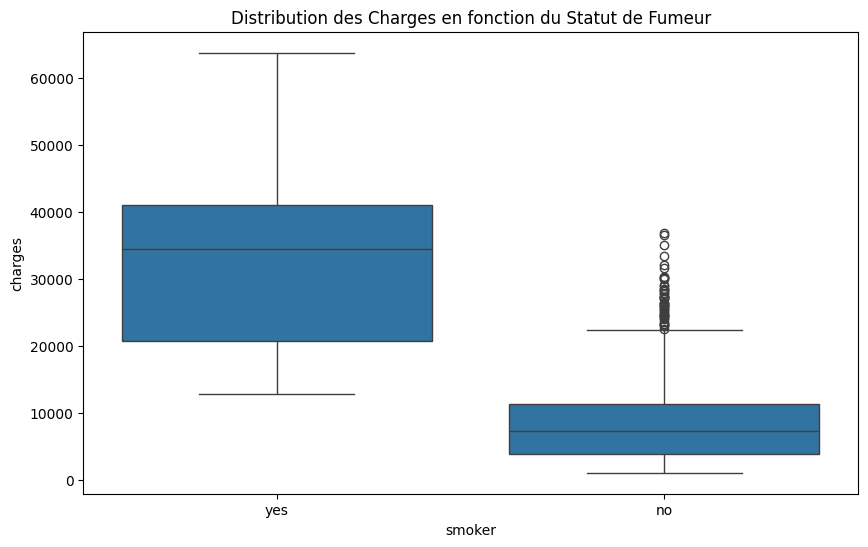

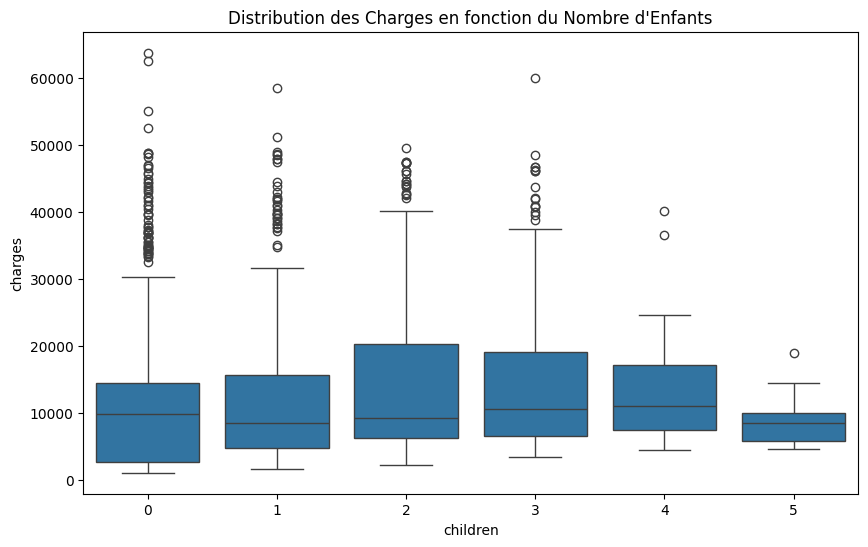

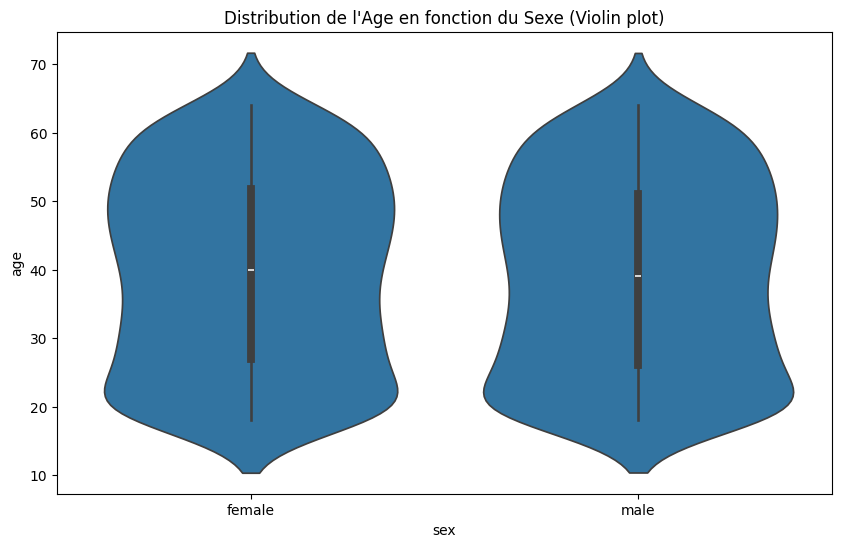

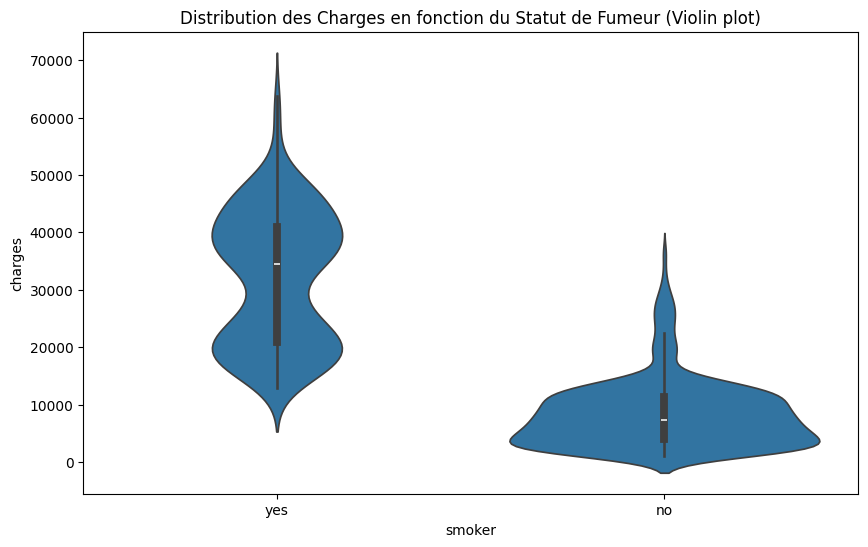

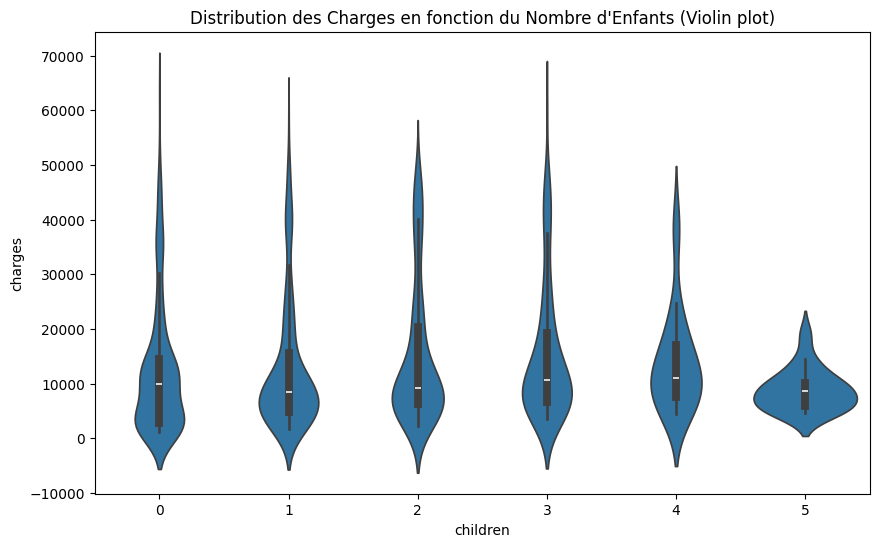

In [ ]:
data["charges"].mode()

0    1639.5631
Name: charges, dtype: float64

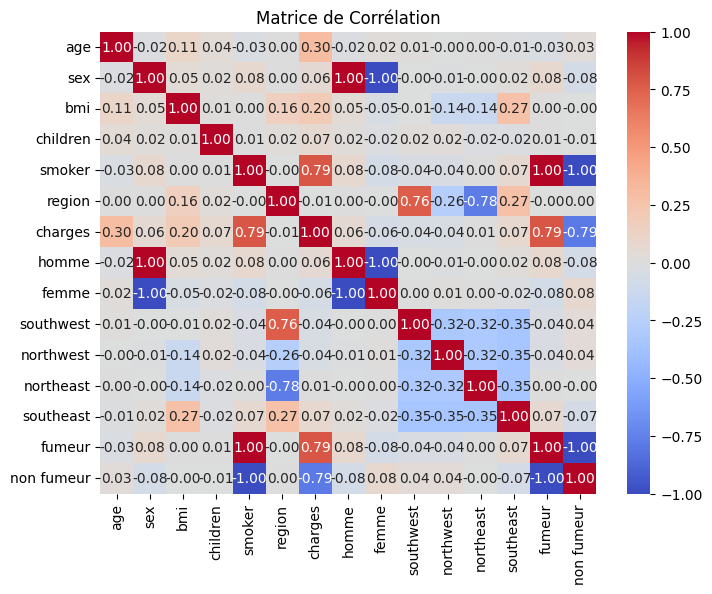

In [24]:

df = pd.DataFrame(data)
# Convertir les variables catégoriques en numériques pour la corrélation
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].astype('category').cat.codes

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()